# Crystallisation Tendency property prediction using Random Forest and Decision Tree

## Using RDKIT

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem,Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"export.csv")
df

,smiles,property,value
0,[*]CC([*])C,Eat,-5.14
1,[*]CC([*])F,Eat,-5.18
2,[*]CC([*])(F)F,Eat,-5.21
3,[*]C(F)C([*])(F)F,Eat,-5.11
4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21
...,...,...,...
6260,[*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*],eps,4.36
6261,[*]C(F)(F)C(F)(F)C(=O)O[*],eps,3.31
6262,[*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*],eps,4.05
6263,[*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*],eps,3.57


In [3]:
def canonical(smiles):
    
    a,b = [],[]
    
    for i in smiles:
        a.append(Chem.MolFromSmiles(i))
        
    for j in a:
        b.append(Chem.MolToSmiles(j))
                 
    return b

##### Chem.MolFromSmiles and Chem.MolToSmiles

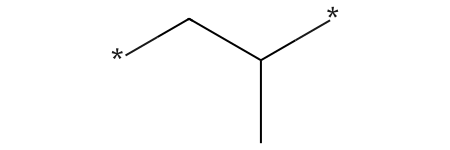

In [4]:
test = "[*]CC([*])C"
t = Chem.MolFromSmiles(test)
t

In [5]:
Chem.MolToSmiles(t)

'*CC(*)C'

In [6]:
Canon= canonical(df.smiles)
df['smiles'] = Canon
df

,smiles,property,value
0,*CC(*)C,Eat,-5.14
1,*CC(*)F,Eat,-5.18
2,*CC(*)(F)F,Eat,-5.21
3,*C(F)C(*)(F)F,Eat,-5.11
4,*CCC(F)(F)C(*)(F)F,Eat,-5.21
...,...,...,...
6260,*c1ccc(-c2ccc(C(F)(F)C(*)(F)F)s2)s1,eps,4.36
6261,*OC(=O)C(F)(F)C(*)(F)F,eps,3.31
6262,*c1ccc(C(F)(F)C(=O)C(*)(F)F)s1,eps,4.05
6263,*c1ccc(C(F)(F)C(=O)C(*)(F)F)cc1,eps,3.57


In [7]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] 
                                    for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call

Mol_descriptors,desc_names = RDkit_descriptors(df['smiles'])

In [123]:
df_200 = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_200

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,7.465278,-2.404514,7.465278,0.724792,0.414720,42.081,36.033,42.046950,18,0,...,0,0,0,0,0,0,0,0,0,0
1,12.361111,-2.118056,12.361111,0.666667,0.409424,46.044,43.020,46.021878,18,0,...,0,0,0,0,0,0,0,0,0,0
2,12.027778,-2.868056,12.027778,0.854167,0.427904,64.034,62.018,64.012457,24,0,...,0,0,0,0,0,0,0,0,0,0
3,11.986111,-3.201389,11.986111,1.187500,0.441842,82.024,81.016,82.003035,30,0,...,0,0,0,0,0,0,0,0,0,0
4,12.941875,-4.883681,12.941875,1.453681,0.510440,128.068,124.036,128.024913,48,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,13.869230,-4.441628,13.869230,0.020181,0.737828,264.268,260.236,263.969055,84,0,...,0,0,0,0,0,0,0,2,0,0
6261,12.202454,-4.574653,12.202454,1.048588,0.534777,144.023,144.023,143.983442,52,0,...,0,0,0,0,0,0,0,0,0,0
6262,13.544977,-4.337917,13.544977,0.343579,0.694102,210.151,208.135,209.976249,70,0,...,0,0,0,0,0,0,0,1,0,0
6263,13.883065,-4.723495,13.883065,0.052901,0.684136,204.122,200.090,204.019828,74,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn

In [205]:
dfeps = df.iloc[392:823,:]

In [206]:
y1 = dfeps.value
x1= df_200.iloc[392:823,:20]

In [127]:
x1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI
392,7.699653,-2.904583,7.699653,0.908125,0.451401,56.108,48.044,56.062600,24,0,NaN,NaN,NaN,NaN,3.500000,4.500000,4.750000,NaN,NaN,NaN
393,7.849653,-3.217083,7.849653,1.048856,0.476641,70.135,60.055,70.078250,30,0,NaN,NaN,NaN,NaN,3.000000,4.000000,4.600000,NaN,NaN,NaN
394,7.999653,-3.529583,7.999653,1.189588,0.492023,84.162,72.066,84.093900,36,0,NaN,NaN,NaN,NaN,2.500000,3.333333,3.833333,NaN,NaN,NaN
395,7.942781,-4.183056,7.942781,1.594757,0.456630,126.243,108.099,126.140851,54,0,NaN,NaN,NaN,NaN,1.666667,2.444444,3.222222,NaN,NaN,NaN
396,8.088944,-4.020556,8.088944,1.323084,0.462513,112.216,96.088,112.125201,48,0,NaN,NaN,NaN,NaN,2.000000,3.000000,3.750000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,7.264745,-1.654005,7.264745,0.428241,0.418693,54.092,48.044,54.046950,22,0,NaN,NaN,NaN,NaN,2.250000,2.750000,3.000000,NaN,NaN,NaN
819,13.355689,-6.145797,13.355689,1.101062,0.077933,586.837,548.533,586.231925,214,0,NaN,NaN,NaN,NaN,0.829268,1.292683,1.707317,NaN,NaN,NaN
820,13.433819,-6.179839,13.433819,1.187002,0.048120,676.962,632.610,676.278876,248,0,NaN,NaN,NaN,NaN,0.750000,1.208333,1.625000,NaN,NaN,NaN
821,13.477971,-5.371436,13.477971,0.963883,0.064731,596.725,552.373,596.321000,234,0,NaN,NaN,NaN,NaN,0.906977,1.511628,2.139535,NaN,NaN,NaN


In [208]:
x1 = x1.dropna(axis=1)

### Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor
  
regressor1 = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,value,prediction
815,12.027778,-2.868056,12.027778,0.854167,0.429568,66.046204,62.018,66.025010,24,0,2.750000,3.000000,3.000000,48.00,46.660919
467,13.668348,-4.973474,13.668348,0.484719,0.033788,712.836000,664.452,712.324748,276,0,0.461538,0.807692,1.250000,16.51,24.975700
688,12.695088,-6.162917,12.695088,1.430098,0.584253,178.253000,164.141,178.066365,66,0,2.090909,2.909091,3.454545,0.13,8.703500
422,13.055998,-5.519293,13.055998,1.095172,0.177912,379.673000,330.281,379.381415,160,0,0.851852,1.222222,1.592593,35.71,30.189300
754,12.985365,-5.118020,12.985365,1.405114,0.187437,338.488000,304.216,338.245710,138,0,0.875000,1.375000,1.916667,93.31,69.810695


In [130]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
R2 =r2_score(y_test,predictions1)
print('R^2 of Crystallisation tendency:', R2)

rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation Tendency:', rmse)

R^2 of Crystallisation tendency: 0.33220878002806975
RMSE of crystallisation Tendency: 18.029794513893854


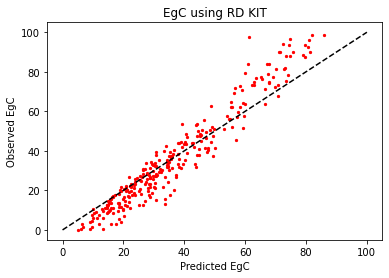

In [131]:
plt.scatter(predictions_train,y_train,c="r",s=5)
plt.plot([0,100], [0,100] ,"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using RD KIT");

### Decision Tree

In [216]:
from sklearn.tree import DecisionTreeRegressor
  
regressor1 =DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,value,prediction
815,12.027778,-2.868056,12.027778,0.854167,0.429568,66.046204,62.018,66.025010,24,0,2.750000,3.000000,3.000000,48.00,44.85
467,13.668348,-4.973474,13.668348,0.484719,0.033788,712.836000,664.452,712.324748,276,0,0.461538,0.807692,1.250000,16.51,13.63
688,12.695088,-6.162917,12.695088,1.430098,0.584253,178.253000,164.141,178.066365,66,0,2.090909,2.909091,3.454545,0.13,0.44
422,13.055998,-5.519293,13.055998,1.095172,0.177912,379.673000,330.281,379.381415,160,0,0.851852,1.222222,1.592593,35.71,17.83
754,12.985365,-5.118020,12.985365,1.405114,0.187437,338.488000,304.216,338.245710,138,0,0.875000,1.375000,1.916667,93.31,88.39


In [217]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation Tendency:', rmse)

RMSE of crystallisation Tendency: 26.54208010737181


# Ablation studies.

#### Random Forest

In [132]:

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators = [5,200, 400] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 150, num = 3)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(x1, y1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 80, 150],
                                        'n_estimators': [5, 200, 400]},
                   random_state=42, verbose=2)

In [133]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 200, 400], 'max_depth': [10, 80, 150]} 

Best Parameters:  {'n_estimators': 400, 'max_depth': 10}  



In [135]:
regressor2 = RandomForestRegressor(n_estimators= 400, max_depth= 10)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.33, random_state=42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation Tendency after tuning for random forest:', Rmse)

MSE of Crystallisation Tendency after tuning: 17.621159147497085


### Decision Tree

In [226]:
dt = DecisionTreeRegressor()

min_samples_split = [3,5, 8] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 150, num = 3)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'min_samples_split': min_samples_split, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

dt_random = RandomizedSearchCV(estimator = dt,param_distributions = random_grid,
               n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)

dt_random.fit(x1, y1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 80, 150],
                                        'min_samples_split': [3, 5, 8]},
                   random_state=42, verbose=2)

In [228]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', dt_random.best_params_, ' \n')

Random grid:  {'min_samples_split': [3, 5, 8], 'max_depth': [10, 80, 150]} 

Best Parameters:  {'min_samples_split': 8, 'max_depth': 10}  



In [229]:
regressor2 = DecisionTreeRegressor(min_samples_split = 8, max_depth= 10)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.33, random_state=42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation Tendency after tuning for decsion tree:', Rmse)

MSE of Crystallisation Tendency after tuning for decsion tree: 24.174587018448694


# Using our algorithm

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [89]:
df = pd.read_csv(r"export.csv")
df

,smiles,property,value
0,[*]CC([*])C,Eat,-5.14
1,[*]CC([*])F,Eat,-5.18
2,[*]CC([*])(F)F,Eat,-5.21
3,[*]C(F)C([*])(F)F,Eat,-5.11
4,[*]CCC(F)(F)C([*])(F)F,Eat,-5.21
...,...,...,...
6260,[*]C(F)(F)C(F)(F)C(S1)=CC=C1C(S2)=CC=C2[*],eps,4.36
6261,[*]C(F)(F)C(F)(F)C(=O)O[*],eps,3.31
6262,[*]C(F)(F)C(=O)C(F)(F)C(S1)=CC=C1[*],eps,4.05
6263,[*]C(F)(F)C(=O)C(F)(F)C(C=C1)=CC=C1[*],eps,3.57


In [90]:
list1 = df.iloc[392:823,0].tolist()
list2 = ["C", "O", "c", "F", "N", "Br", "S"]

In [91]:
def atommass(a):
    mass = {"C": 12, "O": 16, "F": 18, "N": 14, "S": 32, "Br": 80, "c": 12}
    for items, value in mass.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def atomno(a):
    num = {"C": 6, "O": 8, "F": 9, "N": 7, "S": 16, "Br": 35, "c": 6}
    for items, value in num.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def valency(a):
    val = {"C": 4, "O": 2, "F": 1, "N": 3, "S": 2, "Br": 1, "c": 4}
    for items, value in val.items():
        if a == items:
            z = value
            break
        else:
            z = 0
    return z

def hydrogen(smile):
    if smile[0] == "=" or smile[2] == "=" :
        H = 1
    elif smile[0] == "=" and smile[2] == "=":
        H = 0
    else:
        H = 2
    return H

def endhydrogen(smile):
    if smile[0] == "=":
        H = 2
    else:
        H = 3
    return H

In [92]:
identifier = []
A=[]
Aupdated =[]
for i in range(len(list1)):
    orderno = []
    B = []
    for j in range(3, len(list1[i])):
        if list1[i][j] in list2:
            mass = atommass(list1[i][j])
            num = atomno(list1[i][j])
            val = valency(list1[i][j])
            if j != 3 and j != (len(list1[i])-1):
                smiles = list1[i][j-1] + list1[i][j] + list1[i][j+1]
                H = hydrogen(smiles)
            else:
                if j == 3:
                    smiles = list1[i][j] + list1[i][j+1]
                else:
                    smiles = list1[i][j-1] + list1[i][j]
                H = endhydrogen(smiles)
            idno = hash((mass, num, val, H))
            B.append(idno)
        if list1[i][j] == "=":
            orderno.append(j)

    upB = B
    for iteration in range(2): 
        update = []
        for k in range(len(upB)-1):
            Q = []
            if k == 0:
                if list1[i][4]== "=":
                    g = 2
                else:
                    g = 1 
                Q = [iteration + 1 , upB[k]] + [g, upB[k+1]]
            elif k != len(B) -1:
                
                Q = [iteration + 1 , upB[k]] + [1, upB[k-1]] + [1, upB[k+1]]
            else:
                Q = [iteration + 1 , upB[k]] + [1, upB[k-1]]  
            update.append(hash(tuple(Q)))
        upB = update
    A.append(B)
    Aupdated.append(upB)

In [177]:
fingerprint=[]
for i in range(len(Aupdated)):         
    fp = np.zeros(1024)
    remainder = []
    for j in range(len(Aupdated[i])):
        remainder.append(Aupdated[i][j] % 1024)
    for x in remainder:
        fp[x] = 1
    fingerprint.append(fp)

In [178]:
dfnew = pd.DataFrame(fingerprint)

In [179]:
dfnew

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
y = df.iloc[392:823,:].value
x= dfnew
y

392    34.0400
393    20.0100
394    21.6400
395    31.4700
396    75.0600
        ...   
818    25.5800
819    29.0500
820    21.7400
821     7.5500
822     6.8972
Name: value, Length: 431, dtype: float64

### Random Forest

In [181]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(x,  y, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)

In [182]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

R2 =r2_score(y_test, predictions1)

print('R^2 of crystallisation tendency:', R2)

mse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation tendency:', mse)

R^2 of crystallisation tendency: 0.20982745914191514
RMSE of crystallisation tendency: 19.61242932073374


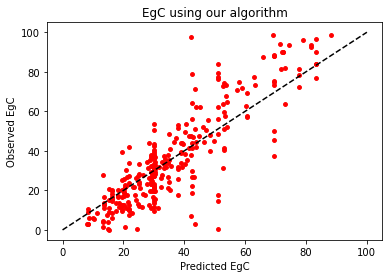

In [183]:
plt.scatter(predictions_train,y_train,c="r",s=15)
plt.plot([0,100],[0,100],"k--")
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using our algorithm");

### Decision Tree

In [230]:
from sklearn.tree import DecisionTreeRegressor
  
regressor1 =DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,value,prediction
423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.366462,52.320173
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,25.150000
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.440000
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,13.260000
362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,72.845000


In [231]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation Tendency:', rmse)

RMSE of crystallisation Tendency: 24.985782540708357


### Ablation study

### Random Forest

In [202]:

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators = [10,200] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 200, num = 2)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 200],
                                        'n_estimators': [10, 200]},
                   random_state=35, verbose=2)

In [203]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [10, 200], 'max_depth': [10, 200]} 

Best Parameters:  {'n_estimators': 200, 'max_depth': 10}  



In [204]:
regressor2 = RandomForestRegressor(n_estimators =200, max_depth =10)

  
regressor2.fit(X_train, y_train) 


predictions2 = regressor2.predict(X_test)

R2 =r2_score(y_test, predictions2)

print('R^2 of crystallisation tendency after tuning:', R2)

Rmse = np.sqrt(mean_squared_error(y_test, predictions2))
print('MSE of Crysatllisation Tendency after tuning:', Rmse)

R^2 of crystallisation tendency after tuning: 0.31963449841241853
MSE of Crysatllisation Tendency after tuning: 18.1987503281231


### Decision Tree

In [232]:
dt = DecisionTreeRegressor()

min_samples_split = [3,5, 8] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 150, num = 3)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'min_samples_split': min_samples_split, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

dt_random = RandomizedSearchCV(estimator = dt,param_distributions = random_grid,
               n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)

dt_random.fit(x, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 80, 150],
                                        'min_samples_split': [3, 5, 8]},
                   random_state=42, verbose=2)

In [233]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', dt_random.best_params_, ' \n')

Random grid:  {'min_samples_split': [3, 5, 8], 'max_depth': [10, 80, 150]} 

Best Parameters:  {'min_samples_split': 3, 'max_depth': 10}  



In [234]:
regressor2 = DecisionTreeRegressor(min_samples_split = 3, max_depth= 10)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.33, random_state=42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation Tendency after tuning for decsion tree:', Rmse)

MSE of Crystallisation Tendency after tuning for decsion tree: 22.62529989654996


# Mordred Fingerprint

In [142]:
# pip install mordred

Note: you may need to restart the kernel to use updated packages.


In [110]:
from mordred import Calculator, descriptors
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [111]:
Morgan_fpts = morgan_fpts(df['smiles'])

In [112]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df


In [114]:
mordred_descriptors = All_Mordred_descriptors(df['smiles'])

  8%|█████▉                                                                         | 471/6265 [00:22<05:03, 19.06it/s]

C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  9%|██████▋                                                                        | 533/6265 [00:24<03:32, 26.98it/s]

C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▎                                                                      | 662/6265 [00:30<08:00, 11.65it/s]

C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▋                                                                      | 688/6265 [00:33<06:43, 13.82it/s]

C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▊                                                                      | 702/6265 [00:34<07:49, 11.85it/s]

C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\SAROJ SATHISH\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████████████████████████████████████████████████████████████████████████| 6265/6265 [05:06<00:00, 20.45it/s]


In [115]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,42.046950,3.822450,18,2,16.0,14.0,3.361111,1.333333
1,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,46.021878,5.752735,18,2,16.0,14.0,3.361111,1.333333
2,4.012290,4.284816,0,0,5.818626,2.074313,4.148627,5.818626,0.969771,2.626363,...,7.989899,31.665095,64.012457,8.001557,28,3,24.0,22.0,4.312500,1.375000
3,4.876567,5.209852,0,0,6.602720,2.175328,4.350655,6.602720,0.943246,2.792781,...,8.466531,34.219913,82.003035,10.250379,42,6,30.0,30.0,5.173611,1.500000
4,7.063820,7.558525,0,0,9.907543,2.343259,4.686518,9.907543,0.990754,3.162641,...,9.223158,39.914584,128.024913,9.144637,115,13,46.0,50.0,6.625000,2.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,14.142228,13.273201,0,0,21.307960,2.474677,4.876137,21.307960,1.183776,3.827745,...,9.973433,67.244773,263.969055,11.998593,601,27,98.0,116.0,8.069444,3.673611
6261,7.818707,8.481783,0,0,11.420199,2.393403,4.786805,11.420199,1.038200,3.263704,...,9.447071,41.712231,143.983442,13.089404,144,17,52.0,59.0,7.486111,2.395833
6262,11.435146,11.493514,0,0,16.837003,2.449034,4.855714,16.837003,1.122467,3.618692,...,9.755625,61.091398,209.976249,12.351544,343,22,78.0,90.0,8.208333,3.083333
6263,12.142253,11.497525,0,0,18.104933,2.435203,4.870405,18.104933,1.131558,3.675879,...,9.817548,48.797213,204.019828,10.200991,420,25,82.0,94.0,8.458333,3.333333


In [136]:
y2 = df.iloc[392:823,:].value
x2= mordred_descriptors.iloc[392:823,:50]
x2 = x2.dropna(axis=1)

In [137]:
x2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d
392,3.644924,4.097495,0,0,6.898979,1.931852,3.863703,6.898979,1.149830,2.595800,...,0.000000,0.000000,0.000000,0.000000,28.0,33.0,46.0,39.0,21.0,9.0
393,4.352030,4.798324,0,0,7.878462,1.969616,3.939231,7.878462,1.125495,2.752840,...,0.000000,0.000000,0.000000,0.000000,34.0,41.0,60.0,55.0,39.0,21.0
394,5.277917,5.655215,0,0,8.565187,2.042079,4.084158,8.565187,1.070648,2.899769,...,0.000000,0.000000,0.000000,0.000000,42.0,49.0,80.0,71.0,66.0,33.0
395,7.289847,7.007240,0,0,12.784906,1.975377,3.950753,12.784906,1.162264,3.210676,...,16.000000,12.000000,8.000000,2.000000,58.0,72.0,112.0,120.0,104.0,88.0
396,6.473351,6.580240,0,0,11.937511,2.006594,4.013187,11.937511,1.193751,3.114665,...,12.000000,7.000000,2.000000,0.000000,52.0,65.0,99.0,104.0,88.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,3.535534,3.869735,0,0,6.987918,1.801938,3.603875,6.987918,1.164653,2.579830,...,0.000000,0.000000,0.000000,0.000000,24.0,28.0,34.0,27.0,18.0,9.0
819,32.833178,20.974434,0,0,52.991556,2.292452,4.584904,52.991556,1.232362,4.654807,...,511.666667,557.555556,438.333333,457.333333,250.0,296.0,460.0,493.0,478.0,429.0
820,38.490032,22.882727,0,0,62.476250,2.310223,4.620445,62.476250,1.249525,4.812143,...,610.666667,663.555556,537.333333,541.333333,294.0,352.0,550.0,596.0,584.0,533.0
821,32.924031,21.181940,0,1,56.773802,2.283224,4.566448,56.773802,1.261640,4.671495,...,454.000000,423.000000,427.000000,418.000000,246.0,305.0,450.0,518.0,501.0,491.0


### Random Forest

In [138]:
regressor1 =DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d,value,prediction
815,5.808525,6.167293,0,0,7.211103,2.302776,4.605551,7.211103,0.901388,2.947233,...,0.0,0.0,26.0,26.0,24.0,9.0,0.0,0.0,48.00,38.938827
467,40.442986,22.393263,0,0,70.164116,2.311961,4.623922,70.164116,1.299335,4.874096,...,656.0,604.0,302.0,376.0,553.0,620.0,572.0,559.0,16.51,27.225100
688,8.803119,9.102927,0,0,15.037425,2.240215,4.480430,15.037425,1.156725,3.401997,...,8.0,0.0,68.0,82.0,125.0,134.0,113.0,86.0,0.13,6.342700
422,19.977329,14.400331,0,0,35.916824,2.125394,4.250789,35.916824,1.238511,4.190577,...,96.0,92.0,163.0,211.0,329.0,383.0,365.0,353.0,35.71,37.967800
754,17.896449,13.565202,0,0,32.084396,2.064490,4.128980,32.084396,1.234015,4.081126,...,140.0,172.0,136.0,170.0,253.0,290.0,270.0,256.0,93.31,78.129300


R^2 of Crystallisation Tendency: 0.4125900534344612
MSE of Crystallisation Tendency: 17.895977960451038


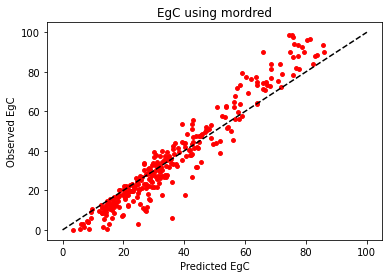

In [139]:
R2 =r2_score(y_test,predictions1)
print('R^2 of Crystallisation Tendency:', R2)

Rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('MSE of Crystallisation Tendency:', mse)

plt.scatter(predictions_train,y_train,c="r",s=15)
plt.plot([0,100], [0,100] ,"k--")
plt.savefig('EgC_mordred_RF.png')
plt.xlabel('Predicted EgC')
plt.ylabel('Observed EgC')
plt.title("EgC using mordred");

### Decision Tree

In [235]:
from sklearn.tree import DecisionTreeRegressor
  
regressor1 =DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

regressor1.fit(X_train, y_train) 


predictions1 = regressor1.predict(X_test)
predictions_train = regressor1.predict(X_train)


result1 = X_test
result1['value'] = y_test
result1['prediction'] = predictions1.tolist()
result1.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,ATS7dv,ATS8dv,ATS0d,ATS1d,ATS2d,ATS3d,ATS4d,ATS5d,value,prediction
815,5.808525,6.167293,0,0,7.211103,2.302776,4.605551,7.211103,0.901388,2.947233,...,0.0,0.0,26.0,26.0,24.0,9.0,0.0,0.0,48.00,15.78
467,40.442986,22.393263,0,0,70.164116,2.311961,4.623922,70.164116,1.299335,4.874096,...,656.0,604.0,302.0,376.0,553.0,620.0,572.0,559.0,16.51,25.45
688,8.803119,9.102927,0,0,15.037425,2.240215,4.480430,15.037425,1.156725,3.401997,...,8.0,0.0,68.0,82.0,125.0,134.0,113.0,86.0,0.13,0.44
422,19.977329,14.400331,0,0,35.916824,2.125394,4.250789,35.916824,1.238511,4.190577,...,96.0,92.0,163.0,211.0,329.0,383.0,365.0,353.0,35.71,43.74
754,17.896449,13.565202,0,0,32.084396,2.064490,4.128980,32.084396,1.234015,4.081126,...,140.0,172.0,136.0,170.0,253.0,290.0,270.0,256.0,93.31,81.89


In [236]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions1))
print('RMSE of crystallisation Tendency using mordred and decision Tree:', rmse)

RMSE of crystallisation Tendency using mordred and decision Tree: 24.089388042168522


## Ablation Studies

### Random Forest

In [144]:

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

n_estimators = [5,200] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 50, num = 2)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x2, y2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 50],
                                        'n_estimators': [5, 200]},
                   random_state=35, verbose=2)

In [145]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 200], 'max_depth': [10, 50]} 

Best Parameters:  {'n_estimators': 200, 'max_depth': 10}  



In [147]:
regressor2 = RandomForestRegressor(n_estimators= 200, max_depth= 10)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x2,y2,test_size=0.33, random_state = 42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation tendency:', Rmse)

MSE of Crystallisation tendency: 16.738487502957717


### Decision Tree

In [237]:
dt = DecisionTreeRegressor()

min_samples_split = [3,5, 8] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 150, num = 3)] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_grid = {'min_samples_split': min_samples_split, 
#                'max_features': max_features,

'max_depth': max_depth}

# 'min_samples_split': min_samples_split,

# 'min_samples_leaf': min_samples_leaf,

# 'bootstrap': bootstrap}

dt_random = RandomizedSearchCV(estimator = dt,param_distributions = random_grid,
               n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)

dt_random.fit(x2, y2)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 80, 150],
                                        'min_samples_split': [3, 5, 8]},
                   random_state=42, verbose=2)

In [238]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', dt_random.best_params_, ' \n')

Random grid:  {'min_samples_split': [3, 5, 8], 'max_depth': [10, 80, 150]} 

Best Parameters:  {'min_samples_split': 8, 'max_depth': 150}  



In [239]:
regressor2 = DecisionTreeRegressor(min_samples_split = 8, max_depth= 150)

X_train1, X_test1, y_train1, y_test1 = train_test_split(x2,y2,test_size=0.33, random_state=42)
  
regressor2.fit(X_train1, y_train1) 


predictions2 = regressor2.predict(X_test1)

Rmse = np.sqrt(mean_squared_error(y_test1, predictions2))
print('MSE of Crystallisation Tendency after tuning for decsion tree:', Rmse)

MSE of Crystallisation Tendency after tuning for decsion tree: 20.81813153097026
